# Descriptive statistics

This notebook is used primarily to calculate descriptive statistics for the dataset providing information on houses for sale in Denmark.

In [51]:
#Importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy import stats
import numpy as np
NaN = np.nan
from scipy.stats import gaussian_kde
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.ticker import FuncFormatter
from scipy.integrate import simps

In [52]:
#Importing dataset
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)
csv_file_path = '../modeldata/NW_merged.csv'
df_final = pd.read_csv(csv_file_path)
df_final.set_index('Unnamed: 0', inplace=True)
df_final.index.name = None
print(len(df_final))

19851


In [53]:
df_final['price/m2'] = df_final['Price']/df_final['m2']

# DATA-PROCESSING

In [55]:
#EKSTREME OBSERVATIONER
print(len(df_final))

##Deleting observations with less than 20 m2 -> To avoid "non-appartments"
outliers_m2 = df_final[(df_final['m2'] < 20) | ((df_final['m2'] < 50) & (df_final['Boligtype'] == 'Landejendom'))]
#print(outliers_m2)
df_final = df_final.drop(outliers_m2.index)

19851


# PLOTTING

/var/folders/t_/b7m19gq13s73s_j4m0ftnxcw0000gn/T/ipykernel_22811/119026465.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plotting['Price'], ax=ax[0], kde=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/t_/b7m19gq13s73s_j4m0ftnxcw0000gn/T/ipykernel_22811/119026465.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either 

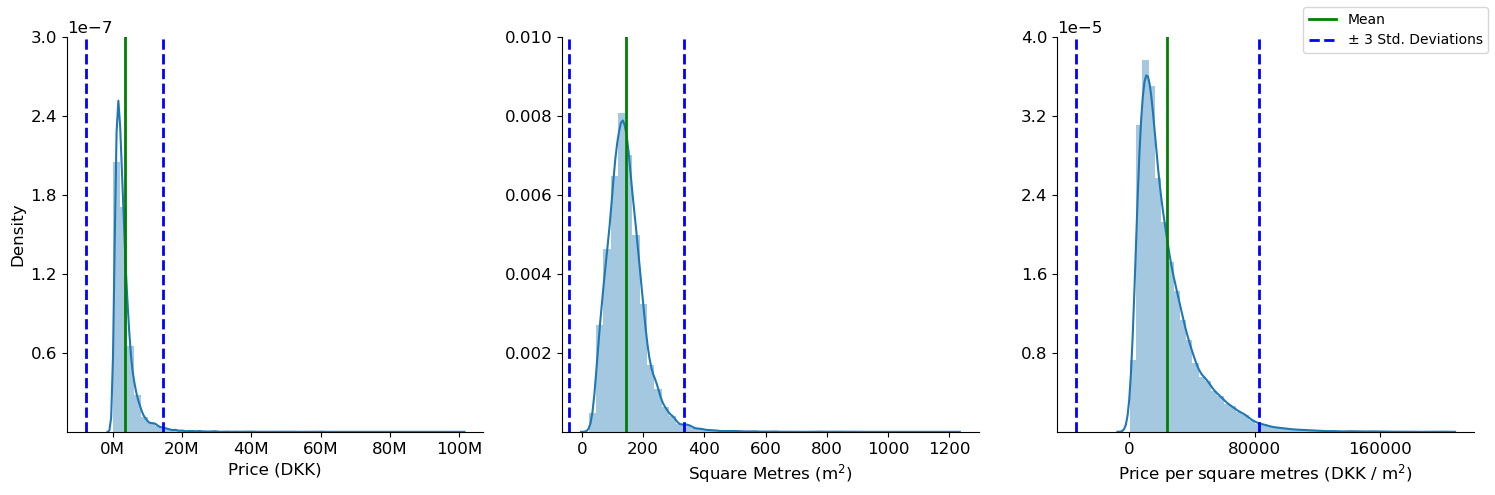

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, ScalarFormatter

def millions(x, pos):
    return f'{int(x / 1_000_000)}M'

# Apply the formatter to the axis
formatter = FuncFormatter(millions)

df_plotting = df_final
plt.rcParams.update({'font.size': 12})

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the distributions
sns.distplot(df_plotting['Price'], ax=ax[0], kde=True)
sns.distplot(df_plotting['m2'], ax=ax[1], kde=True)
sns.distplot(df_plotting['price/m2'], ax=ax[2], kde=True)

# Calculate median and standard deviation for each variable
mean_price = df_plotting['Price'].mean()
std_price = df_plotting['Price'].std()

mean_m2 = df_plotting['m2'].mean()
std_m2 = df_plotting['m2'].std()

mean_price_m2 = df_plotting['price/m2'].mean()
std_price_m2 = df_plotting['price/m2'].std()

# Plot the median and three standard deviations from the median for 'Price'
ax[0].axvline(x=mean_price, color='green', linestyle='-', linewidth=2, label='Mean')
ax[0].axvline(x=mean_price - 3 * std_price, color='blue', linestyle='--', linewidth=2, label='\u00B1 3 Std. Deviations') #\u00B1 er +-
ax[0].axvline(x=mean_price + 3 * std_price, color='blue', linestyle='--', linewidth=2)
ax[0].yaxis.set_major_locator(MaxNLocator(nbins=5))

# Plot the median and three standard deviations from the median for 'm2'
ax[1].axvline(x=mean_m2, color='green', linestyle='-', linewidth=2, label='Mean')
ax[1].axvline(x=mean_m2 - 3 * std_m2, color='blue', linestyle='--', linewidth=2, label=' \u00B1 3 Std. Deviations')
ax[1].axvline(x=mean_m2 + 3 * std_m2, color='blue', linestyle='--', linewidth=2)
ax[1].yaxis.set_major_locator(MaxNLocator(nbins=5))
ax[1].set_ylabel('')  # Remove y-label on the second plot

# Plot the median and three standard deviations from the median for 'price/m2'
ax[2].axvline(x=mean_price_m2, color='green', linestyle='-', linewidth=2, label='Mean')
ax[2].axvline(x=mean_price_m2 - 3 * std_price_m2, color='blue', linestyle='--', linewidth=2, label='\u00B1 3 Std. Deviations')
ax[2].axvline(x=mean_price_m2 + 3 * std_price_m2, color='blue', linestyle='--', linewidth=2)
ax[2].xaxis.set_major_locator(MaxNLocator(nbins=4))
ax[2].yaxis.set_major_locator(MaxNLocator(nbins=5))
ax[2].set_ylabel('')  # Remove y-label on the third plot

# Formatting the x-axes
ax[0].xaxis.set_major_formatter(formatter)
ax[0].set_xlabel('Price (DKK)')
ax[1].set_xlabel('Square Metres (m$^2$)')
ax[2].set_xlabel('Price per square metres (DKK / m$^2$)')

# Removing spines for a cleaner look
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    y_labels = [label for label in a.get_yticks() if label != 0]
    a.set_yticks(y_labels)


# Add one legend for all
handles, labels = ax[0].get_legend_handles_labels()
f.legend(handles, labels, loc='upper right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()
f.savefig('6_1.png', format='png', dpi=300)

/var/folders/t_/b7m19gq13s73s_j4m0ftnxcw0000gn/T/ipykernel_22811/1778475913.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Kommune'] = df_filtered['Kommune'].map(label_mapping)


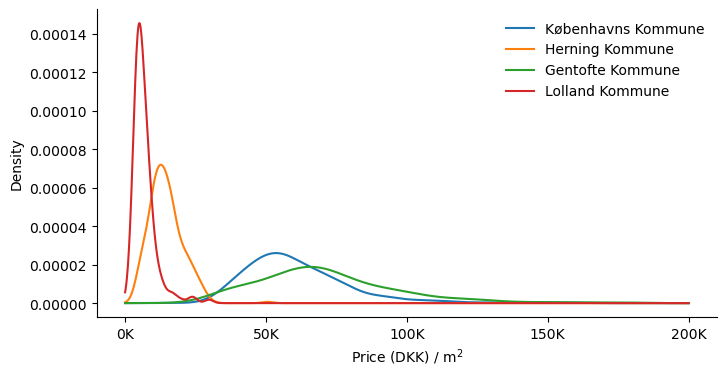

In [77]:


# Use 'classic' style
plt.style.use('default')

# Restriction: When plotting, we set the upper price/m2 limit to 200,000.
df_plotting['price/m2'] = df_plotting['price/m2'].clip(upper=200000)

# Function to format the x-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'

# Filter municipalities
filter = ['københavns kommune', 'gentofte kommune', 'herning kommune', 'lolland kommune']
df_filtered = df_plotting[df_plotting['Kommune'].isin(filter)]

label_mapping = {
    'københavns kommune': 'Københavns Kommune',
    'gentofte kommune': 'Gentofte Kommune',
    'herning kommune': 'Herning Kommune',
    'lolland kommune': 'Lolland Kommune'
}

df_filtered['Kommune'] = df_filtered['Kommune'].map(label_mapping)

# Create a single subplot
f, ax = plt.subplots(figsize=(8, 4))

# Plotting density manually for each kommune
for kommune in df_filtered['Kommune'].unique():
    # Select data for the current kommune
    data = df_filtered[df_filtered['Kommune'] == kommune]['price/m2']
    
    # Calculate the density using gaussian_kde
    density = gaussian_kde(data)
    x_vals = np.linspace(0, 200000, 1000)
    y_vals = density(x_vals)
    y_vals /= simps(y_vals, x_vals)
    
    # Plot the density
    ax.plot(x_vals, y_vals, label=kommune)

# Formatting
ax.set_xlabel('Price (DKK) / m$^2$')
ax.set_ylabel('Density')
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))

# Display the legend
ax.legend(loc='upper right', frameon=False)

# Show the plot
plt.show()
f.savefig('6_2.png', format='png', dpi=300)

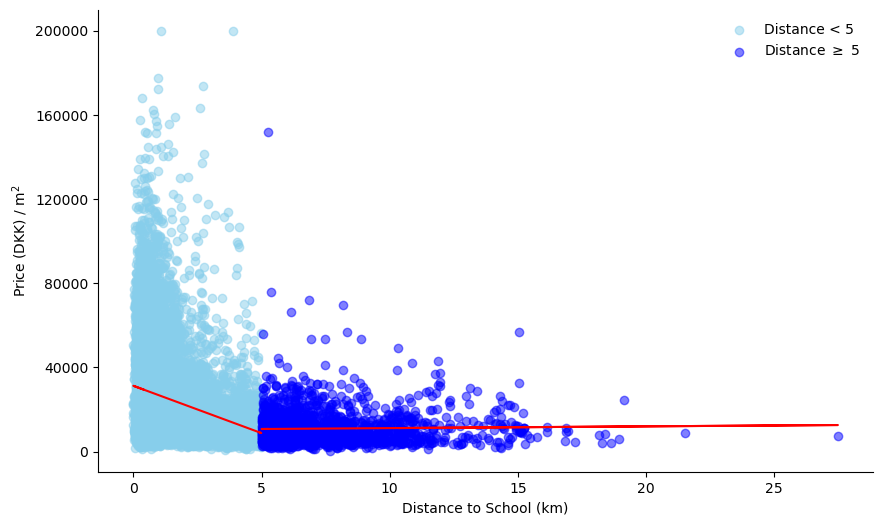

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df_segment_1 = df_final[df_final['Distance to school']<5]
df_segment_2 = df_final[df_final['Distance to school']>=5]

# Define the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for the first segment (Distance < 5)
ax.scatter(df_segment_1['Distance to school'], df_segment_1['price/m2'], color='skyblue', label='Distance < 5', alpha=0.5)

# Perform linear regression for the first segment
X1 = df_segment_1['Distance to school'].values.reshape(-1, 1)
y1 = df_segment_1['price/m2'].values
model1 = LinearRegression().fit(X1, y1)
y_pred1 = model1.predict(X1)
ax.plot(df_segment_1['Distance to school'], y_pred1, color='red')

# Scatter plot for the second segment (Distance >= 5)
ax.scatter(df_segment_2['Distance to school'], df_segment_2['price/m2'], color='blue', label='Distance $\geq$ 5', alpha=0.5)

# Perform linear regression for the second segment
X2 = df_segment_2['Distance to school'].values.reshape(-1, 1)
y2 = df_segment_2['price/m2'].values
model2 = LinearRegression().fit(X2, y2)
y_pred2 = model2.predict(X2)
ax.plot(df_segment_2['Distance to school'], y_pred2, color='red')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Formatting the plot
ax.legend(frameon=False)
ax.set_xlabel('Distance to School (km)')
ax.set_ylabel('Price (DKK) / m$^2$')
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

# Show the plot
plt.show()
fig.savefig('6_5.png', format='png', dpi=300)

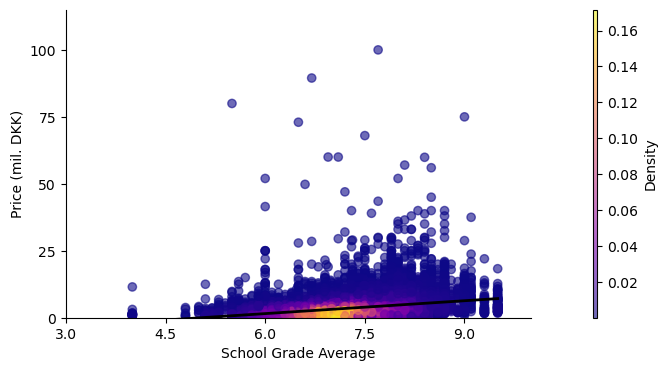

In [79]:
# Data
x = df_final['Karakter']
y = df_final['Price'] / 1e6  # Convert to millions

# Beregn tæthed
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(8, 4))

# Plot scatter plot farvet efter tæthed
scatter = plt.scatter(x=x, y=y, c=z, cmap='plasma', alpha=0.6)

# Plot regressionslinje med tydelig farve og linjetykkelse
sns.regplot(x=x, y=y, scatter=False, color='black', line_kws={"linewidth": 2})

# Titel og labels
plt.xlabel('School Grade Average')
plt.ylabel('Price (mil. DKK)')

# Begræns y-aksen
plt.ylim(0, 115)
plt.xlim(3, 10)

# Fjern de øverste og højre spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Tilføj en farvebjælke i bunden, gør den smallere og simplere
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.1, aspect=70)
cbar.set_label('Density', fontsize=10)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='lower'))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(prune='lower'))

# Sæt baggrunden til hvid og fjern gitterlinjer for et mere enkelt look
plt.gca().set_facecolor('white')
plt.grid(False)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust the number of bins
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust the number of bins

# Show the plot
plt.savefig('6_9.png', format='png', dpi=300)


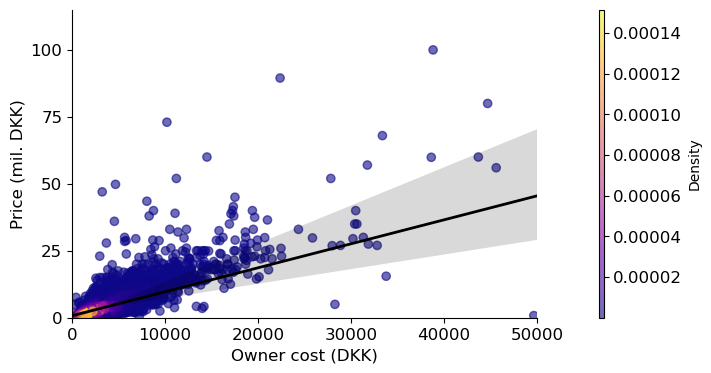

In [73]:
# Data
x = df_final['Ejerudgift']
y = df_final['Price'] / 1e6  # Convert to millions

# Beregn tæthed
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(8, 4))

# Plot scatter plot farvet efter tæthed
scatter = plt.scatter(x=x, y=y, c=z, cmap='plasma', alpha=0.6)

# Plot regressionslinje med tydelig farve og linjetykkelse
sns.regplot(x=x, y=y, scatter=False, color='black', line_kws={"linewidth": 2})

# Titel og labels
#plt.title('Scatterplot of Grades vs. Housing Prices', fontsize=16, fontweight='bold')
plt.xlabel('Owner cost (DKK)')
plt.ylabel('Price (mil. DKK)')

# Begræns y-aksen til 20 millioner DKK
plt.ylim(0, 115)
plt.xlim(0, 50000)

# Fjern de øverste og højre spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Tilføj en farvebjælke i bunden, gør den smallere og simplere
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.1, aspect=70)
cbar.set_label('Density', fontsize=10)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='lower'))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(prune='lower'))

# Sæt baggrunden til hvid og fjern gitterlinjer for et mere enkelt look
plt.gca().set_facecolor('white')
plt.grid(False)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust the number of bins
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust the number of bins


# Show the plot
plt.savefig('6_16.png', format='png', dpi=300)